Loaded 924 images with shape: (924, 128, 128, 3)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,672 (12.61 MB)

 Trainable params: 3,305,672 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.1532 - loss: 2.1130 - val_accuracy: 0.2649 - val_loss: 2.0036
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 986ms/step - accuracy: 0.2124 - loss: 1.9872 - val_accuracy: 0.2324 - val_loss: 1.9046
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 997ms/step - accuracy: 0.3060 - loss: 1.8510 - val_accuracy: 0.3514 - val_loss: 1.7957
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.3542 - loss: 1.7190 - val_accuracy: 0.3027 - val_loss: 1.8284
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.3714 - loss: 1.7481 - val_accuracy: 0.3622 - val_loss: 1.7514
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.4032 - loss: 1.5411 - val_accuracy: 0.4054 - val_loss: 1.6163
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5398 - loss: 1.3890 - val_accuracy: 0.3892 - val_loss: 1.6352
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 991ms/step - accuracy: 0.5603 - loss: 1.3081 - val_accuracy: 0.4649 - 

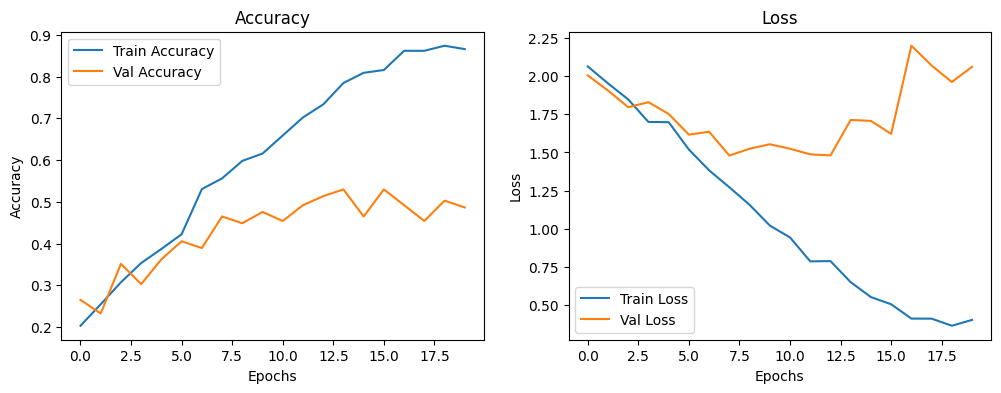

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model

# Dataset path
dataset_path = "/content/drive/MyDrive/NNDL Dataset/Dataset"

# Categories (folders)
categories = ["gond painting", "kalighat painting", "kangra painting", "kerala mural",
              "madhubani painting", "mandana art drawing", "pichwai painting", "warli painting"]

# Image loading settings
img_size = (128, 128)
valid_extensions = (".jpg", ".jpeg", ".png")

def load_images(folder_path, img_size):
    images = []
    labels = []
    for category in categories:
        category_path = os.path.join(folder_path, category)
        if not os.path.exists(category_path):
            print(f"Warning: {category_path} does not exist.")
            continue
        for filename in os.listdir(category_path):
            if filename.lower().endswith(valid_extensions):
                img_path = os.path.join(category_path, filename)
                img = load_img(img_path, target_size=img_size)
                img_array = img_to_array(img) / 255.0  # Normalize
                images.append(img_array)
                labels.append(categories.index(category))
    return np.array(images), np.array(labels)

# Load dataset
X, y = load_images(dataset_path, img_size)
print(f"Loaded {len(X)} images with shape: {X.shape}")

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build CNN model
def build_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Define input shape
input_shape = (img_size[0], img_size[1], 3)
num_classes = len(categories)

# Compile model
cnn_model = build_cnn_model(input_shape, num_classes)
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

# Train model
history = cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
